# Problem 2 Plot

## Notebook Configuration

In [1]:
# import packages
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rich import print
from tqdm import tqdm

In [2]:
# configure plotting
# define the figure save directory
figure_dir = Path("figures")
os.makedirs(figure_dir, exist_ok=True)

# set plot style
cstyle_file_url = r"https://gist.githubusercontent.com/CalvinSprouse/30bba681da1dd0023e948ca207fad0fc/raw/80a1ae94031873a57c9624103e83f5caf175ac86/cstyle.mplstyle"
plt.style.use(["default", cstyle_file_url])

## Calculation

In [53]:
# define the E_HF correction function
def E_HF(n, j, alpha = None):
    # define alpha to be default value
    if alpha is None: alpha = 1/137

    # calculate the unperturbed energy
    E0 = -13.6/n**2

    # calculate the multiplicitive factor of E0
    E0_factor = 1 + (alpha**2/n**2)*( (n/(j + (1/2))) - (3/4) )

    # calculate and return the hyper-fine correction
    return E0*E0_factor

In [54]:
# create the three-tuple of plotting values
energy_dict = {
    "j": [1/2, 1/2, 1/2, 1/2, 3/2, 3/2, 3/2, 3/2],
    "slope": [1, -1, 1/3, -1/3, 2, 2/3, -2/3, -2],
}
energy_df = pd.DataFrame(energy_dict)

# calculate the hyper-fine energy from j with n=2
energy_df["E_HF"] = (E_HF(2, energy_df["j"]) + 3.4)*10**5

## Plotting

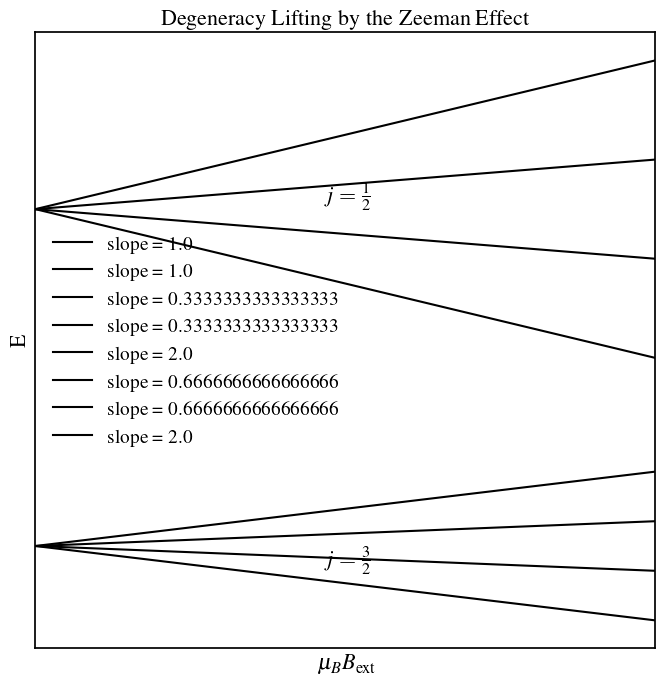

In [62]:
# plot energy degeneracy lifting
fig, ax = plt.subplots()

# on the vertical axis should be energy
# the energy is the sum of E_HF and slope*the horizontal
# the horizontal represents B_ext
for i, (j, slope, E_HF) in energy_df.iterrows():
    ax.plot(
        np.linspace(0, 1, 100), 
        E_HF + slope*np.linspace(0, 1, 100),
        label = f"slope = {abs(slope)}"
    )

# set the axis labels
ax.set_xlabel(r"\(\mu_B B_\text{ext}\)")
ax.set_ylabel(r"E")

# remove the vertica and horizontal axis labels and ticks
ax.yaxis.set_tick_params(which="both", left=False, right=False, labelleft=False)
ax.xaxis.set_tick_params(which="both", bottom=False, top=False, labelbottom=False)

# place two labels on the vertical axis at the two different values of E_HF
# the highest should be labeled j=1/2
# the lower should be labeled j=3/2
E_HF_high = energy_df["E_HF"].max()
E_HF_low = energy_df["E_HF"].min()
ax.text(0.5, E_HF_high, r"\(j=\frac{1}{2}\)", ha="center", va="bottom")
ax.text(0.5, E_HF_low, r"\(j=\frac{3}{2}\)", ha="center", va="top")

# set the title
ax.set_title(r"Degeneracy Lifting by the Zeeman Effect")

# set the legend
ax.legend()

# save the figure
fig.savefig(figure_dir / "energy_degeneracy_lifting")